Link to animation:

- Lloyd’s Algo: http://tech.nitoyon.com/en/blog/2013/11/07/k-means/
- K-Means Initialisation Problem: https://www.naftaliharris.com/blog/visualizing-k-means-clustering/
- Hierarchical Clustering: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/015/038/original/hierarch.gif?1663699414
- DBSCAN Animation: https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/
- For visualising bivariate gaussian: https://demonstrations.wolfram.com/TheBivariateNormalDistribution/


## Importing Data

In [1]:
# Customer Segmentation Data
# !gdown 1qYPra6zVRJ5nl1WCXCoKsUOhoX0PYL9e

In [2]:
#Stock Data
# !gdown 1__x7gU9JQVC6e9azeNFKgHeT-YLGr8dX

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12,10)

In [4]:
df = pd.read_csv('E-commerce.csv')
df.head()

ID  n_clicks  n_visits  amount_spent  amount_discount  \
0  1476       130        65    213.905831        31.600751   
1  1535       543        46    639.223004         5.689175   
2  1807       520       102   1157.402763       844.321606   
3  1727       702        83   1195.903634       850.041757   
4  1324       221        84    180.754616        64.283300   

   days_since_registration  profile_information  
0                      233                  235  
1                      228                  170  
2                      247                  409  
3                      148                  200  
4                      243                  259

In [5]:
X=df.drop("ID",axis=1)

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

## K-Means with random K

In [7]:
df.drop("ID",axis=1).columns

Index(['n_clicks', 'n_visits', 'amount_spent', 'amount_discount',
       'days_since_registration', 'profile_information'],
      dtype='object')

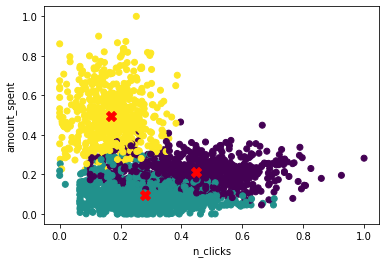

In [8]:
from sklearn.cluster import KMeans

k = 3 ## arbitrary value
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

##coordinates of the cluster centers
# kmeans.cluster_centers_
clusters = pd.DataFrame(X, columns=df.drop("ID",axis=1).columns)
clusters['label'] = kmeans.labels_

plt.scatter(clusters['n_clicks'], clusters['amount_spent'], c=clusters['label'], )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], color="red", marker="X", s=100)
plt.xlabel('n_clicks')
plt.ylabel('amount_spent');

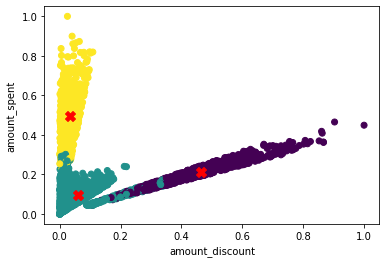

In [9]:
plt.scatter(clusters['amount_discount'], clusters['amount_spent'], c=clusters['label'], )
plt.scatter(kmeans.cluster_centers_[:, 3], kmeans.cluster_centers_[:, 2], color="red", marker="X", s=100)
plt.xlabel('amount_discount')
plt.ylabel('amount_spent');

In [10]:
import plotly.express as px
fig = px.scatter_3d(clusters, x='amount_discount', y='amount_spent', z='n_clicks', color='label', width=800, height=800)
fig.show()

In [11]:
len(df)

2500

#### Interpreting Results of KMeans

- People who dont wait for discounts (rich) - Only run ads, dont give discounts
- People who only buy when there is discount (economical), run more discounts, save money on ads
- People who dont exhibit either pattern strongly. (new / rare), do ads and discount, get them addicted.

## Hierarchical CLustering for Stocks 

In [12]:
df_stocks = pd.read_csv('Stocks.csv', index_col=0)

In [13]:
df_stocks.head()

marketCap  regularMarketVolume  earningsQuarterlyGrowth  \
ADANIPORTS  1657751076864             12901505                   -0.179   
ASIANPAINT  3167850856448               933762                    0.789   
AXISBANK    2221430013952              6403035                    0.859   
BAJAJ-AUTO   996960239616               442625                   -0.006   
BAJFINANCE  4343084089344               819955                    1.590   

            bookValue  totalRevenue  returnOnAssets  profitMargins  \
ADANIPORTS    180.288  159007899648         0.00000        0.28442   
ASIANPAINT    143.991  319870205952         0.00000        0.10876   
AXISBANK      400.581  433654104064         0.01474        0.37225   
BAJAJ-AUTO   1033.043  348966289408         0.00000        0.17649   
BAJFINANCE    724.584  202325999616         0.00000        0.42614   

            earningsGrowth  return_2020  
ADANIPORTS          -0.207   -16.891368  
ASIANPAINT           0.788    -3.813726  
AXISBANK             0.855   -43.305372  
BAJAJ-AUTO          -0.007    -0.566448  
BAJFINANCE           1.586   -34.809406

In [14]:
df_stocks.shape

(46, 9)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_stocks)
X = scaler.transform(df_stocks)

In [16]:
scaled_df = pd.DataFrame(X, columns=df_stocks.columns, index=df_stocks.index)

In [17]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch

# Refer https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
Z = sch.linkage(scaled_df, method='ward') #linkage = ward

Text(0, 0.5, 'distance')

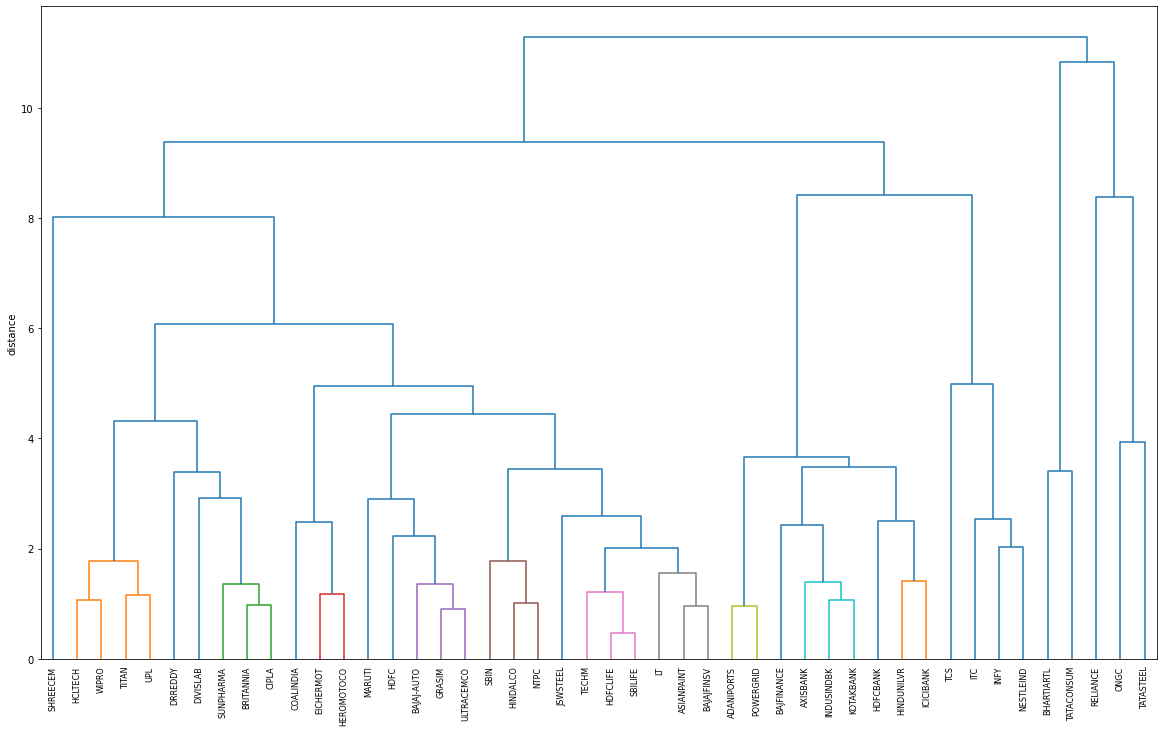

In [18]:
fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=scaled_df.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

#### **Interpreting the Dendrogram**
- Note that we are now plotting companies that are similar to one another.
- The leaves of the tree correspond to the records.
- The length of the branch in the tree indicates the degree of dissimilarity between corresponding clusters.
- All the clusterings are made in the 8 dimensional space

#### **Insights**
- We may think that companies working in same field will have similar trends in stocks and will be clustered together.
- In some cases, this is right. For example, we can see that AXISBANK, HDFCBANK, BAJAJFINANCE will be grouped together. 
- While in some cases, it is not. Such as chances of tech companies like TCS, WIPRO, TECHMAHINDRA grouping together are only when we set the number of clusters very low.

## Hierarchical Clustering on Customer Segmentation

In [19]:
# import hierarchical clustering libraries
from sklearn.cluster import AgglomerativeClustering


# create clusters
hc_2020 = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
y_pred = hc_2020.fit_predict(clusters.iloc[:, :-1])

In [20]:
clusters['hier_labels'] = y_pred

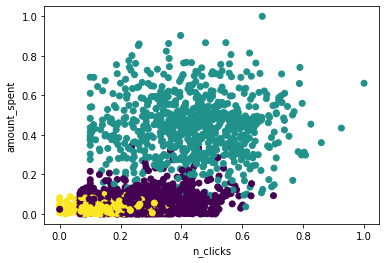

In [21]:
plt.scatter(clusters['n_clicks'], clusters['amount_discount'], c=clusters['hier_labels'])
plt.xlabel('n_clicks')
plt.ylabel('amount_spent')
plt.show()

In [22]:
import plotly.express as px
fig = px.scatter_3d(clusters, x='amount_discount', y='amount_spent', z='n_clicks', color='hier_labels', width=800, height=800)
fig.show()

---

## DBSCAN

In [34]:
from sklearn.cluster import DBSCAN
dbsc = DBSCAN(eps = 0.5, min_samples = 10).fit(clusters.iloc[:, :-2])

In [35]:
dbscan_labels = dbsc.labels_
clusters['dbscan_labels'] = dbscan_labels

In [36]:
clusters['dbscan_labels'].unique()

array([ 0,  1,  2,  3,  4, -1])

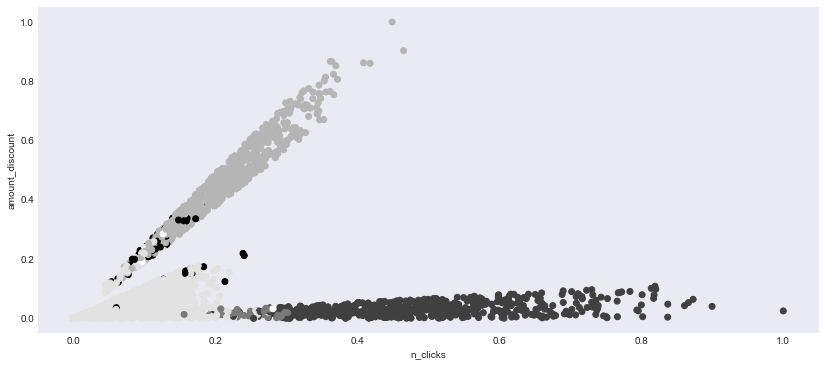

In [37]:
plt.scatter(clusters['amount_spent'], clusters['amount_discount'], c=clusters['dbscan_labels'])
plt.xlabel('n_clicks')
plt.ylabel('amount_discount')
plt.show()

In [38]:
import plotly.express as px
fig = px.scatter_3d(clusters, x='amount_discount', y='amount_spent', z='n_clicks', color='dbscan_labels', width=800, height=800)
fig.show()

---

# Gaussian Mixture Models

In [28]:
import numpy as np
import pandas as pd
import plotly.express as px

In [29]:
# Importing the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal


plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14,6
fig = plt.figure()

u1 = 0
u2 = 0
sigma_1 = 1
sigma_2 = 1
cov = 0

# Params
mean = np.array([u1,u1])
cov = np.array([[sigma_1, cov], [cov, sigma_2]])
distr = multivariate_normal(cov=cov, mean=mean, seed=42)

x = np.linspace(-3*sigma_1, 3*sigma_1, num=50)
y = np.linspace(-3*sigma_2, 3*sigma_2, num=50)
X, Y = np.meshgrid(x,y)

# Generating the density function
# for each point in the meshgrid
pdf = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
        
X = X.reshape(-1)
Y = Y.reshape(-1)
pdf = pdf.reshape(-1)

gauss_3d = pd.DataFrame()
gauss_3d['X'] = X
gauss_3d['Y'] = Y
gauss_3d['Z'] = pdf
px.scatter_3d(gauss_3d, x='X', y='Y', z='Z', color='Z')

<Figure size 1008x432 with 0 Axes>

Add another gaussain

In [30]:
# Importing the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal


plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14,6
fig = plt.figure()

u1 = 2
u2 = 3
sigma_1 = 1
sigma_2 = 1
cov = 0

# Params
mean = np.array([u1,u1])
cov = np.array([[sigma_1, cov], [cov, sigma_2]])
distr = multivariate_normal(cov=cov, mean=mean, seed=42)

x = np.linspace(-3*sigma_1, 3*sigma_1, num=50)
y = np.linspace(-3*sigma_2, 3*sigma_2, num=50)
X, Y = np.meshgrid(x,y)

# Generating the density function
# for each point in the meshgrid
pdf = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
        
X = X.reshape(-1)
Y = Y.reshape(-1)
pdf = pdf.reshape(-1)

gauss_3d_2 = pd.DataFrame()
gauss_3d_2['X'] = X
gauss_3d_2['Y'] = Y
gauss_3d_2['Z'] = pdf
px.scatter_3d(gauss_3d.append(gauss_3d_2), x='X', y='Y', z='Z', color='Z')

/var/folders/pb/lctdnpp509v1l7y5t98dvxj00000gn/T/ipykernel_29948/3976812874.py:41: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



<Figure size 1008x432 with 0 Axes>

Index(['n_clicks', 'n_visits', 'amount_spent', 'amount_discount',
       'days_since_registration', 'profile_information'],
      dtype='object')


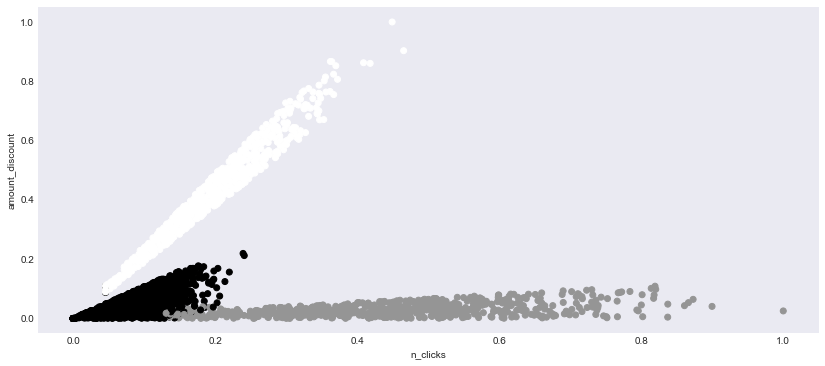

In [31]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(clusters.iloc[:, :-3])
gmm_labels = gmm.predict(clusters.iloc[:, :-3])
print(clusters.columns[:-3])
clusters['gmm_labels'] = gmm_labels
plt.scatter(clusters['amount_spent'], clusters['amount_discount'], c=clusters['gmm_labels'])
plt.xlabel('n_clicks')
plt.ylabel('amount_discount')
plt.show()

In [32]:
import plotly.express as px
fig = px.scatter_3d(clusters, x='amount_discount', y='amount_spent', z='n_clicks', color='gmm_labels', width=800, height=800)
fig.show()

In [33]:
gmm.predict_proba(clusters.iloc[:, :-4])

array([[1.97792606e-003, 1.79555457e-001, 8.18466617e-001],
       [8.75449250e-010, 1.44884557e-002, 9.85511543e-001],
       [1.00000000e+000, 1.69113471e-071, 8.76885379e-015],
       ...,
       [6.28920966e-002, 4.84610283e-002, 8.88646875e-001],
       [1.34984216e-210, 1.00000000e+000, 1.02912081e-032],
       [1.00000000e+000, 2.44659008e-119, 6.63842413e-027]])